# Project - Data Science

## Fullname (nickname): Kanitin Sukdit(Scent)

<h2 style="color:#ff3535;">Project Topic : </h2>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The factors behind customer demands for food delivery in the city.

---
<h2 style="color:#ff3535;">Current Situation / Problem Statement :</h2>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In metropolitan areas, food delivery is highly prevalent. People prefer to order food online because metropolitan areas are becoming busier and more attached to their jobs. Startups like Swiggy, Zomato, Dunzo, and others provide consumers with a wide range of options for food delivery to their doorsteps. These start-ups serve as a means of meal delivery, and restaurants serve as locations for preparing the food that customers want. It's interesting the growing use of the customer's app. See how that is improving with factors that are contributing to the demand for food delivery in the city.	


<h2 style="color:#ff3535;">Objectives :</h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Analyze key strategies to create a food delivery app that will attract more customers and be sustainable.

<h2 style="color:#ff3535;">Hypothesis-driven Questions :</h2>

1. Factors are contributing to the demand for food delivery.
2. The topic is why customers are dissatisfied with the food delivery service.

## Dataset:
Thank you dataset from : https://www.kaggle.com/code/benroshan/food-delivery-eda-starter/data
<br/>This dataset was collected form the residents of Bangalore.

In [3]:
#import libraries basic and visualization graph
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns #

#import Natural Language for analyze text review
import nltk 
import re #remove special character in review 
import string #use string.punctuation for special character
from nltk.corpus import stopwords #divide sentence to a word set  
from textblob import TextBlob #divide positive and negative review
from wordcloud import WordCloud,STOPWORDS #make word cloud

#import libraries plot latitude and longitude
import folium
from folium import Marker

#import dataset from kaggle Food Delivery 🍱 : EDA Starter and check information 
df = pd.read_csv('onlinedeliverydata.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [4]:
#check row and columns
df.shape

(388, 55)

In [5]:
#check datatype and null in dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [6]:
#check columns datatypes 
df.columns 
pd.DataFrame(df.dtypes, columns=["Datatypes"])

,Datatypes
Age,int64
Gender,object
Marital Status,object
Occupation,object
Monthly Income,object
Educational Qualifications,object
Family size,int64
latitude,float64
longitude,float64
Pin code,int64



## Data Preparation (Data Cleaning):


1. Check each columns option for odd values that shouldn't be present
2. Check the Max Mix value in all the number columns
3. Check of NaN in columns 

#### Section 1

In [7]:
# Loop in df columns for check odd values that shouldn't be present
for c in df.columns:
    if df[c].dtypes == object:
        print(df[[c]].value_counts())
        print("--------------------")

Gender
Male      222
Female    166
dtype: int64
--------------------
Marital Status   
Single               268
Married              108
Prefer not to say     12
dtype: int64
--------------------
Occupation    
Student           207
Employee          118
Self Employeed     54
House wife          9
dtype: int64
--------------------
Monthly Income 
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
dtype: int64
--------------------
Educational Qualifications
Graduate                      177
Post Graduate                 174
Ph.D                           23
School                         12
Uneducated                      2
dtype: int64
--------------------
Medium (P1)       
Food delivery apps    358
Walk-in                22
Direct call             5
Web browser             3
dtype: int64
--------------------
Medium (P2) 
 Direct call    208
 Walk-in        104
 Web browser     76
dtype: int64
--------------------
Meal(P1

Except for the column fields, there are no literal values that should not be included in the options after checking the columns.

#### Section 2

In [8]:
#check number is not invalid
df[['Age','Family size']].describe()  

,Age,Family size
count,388.000000,388.000000
mean,24.628866,3.280928
std,2.975593,1.351025
min,18.000000,1.000000
25%,23.000000,2.000000
50%,24.000000,3.000000
75%,26.000000,4.000000
max,33.000000,6.000000


 There are no abnormally high or low values in the range.

#### Section 3

In [9]:
#Check of NaN in columns 
df.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

From this result is not Nan value.

## Exploratory Data Analysis (EDA):

1. Examine the relationship that affects how consumers are influenced to use food delivery apps using the data and other factors.
2. Examine consumer feedback on the various services they received.
3. Add a summary of the findings to the initial factors that were discovered.

#### Section 1 : Demographic

In [10]:
#Demographic analysis check avenge of Gender and Family size
df[['Age','Family size']].mean()

Age            24.628866
Family size     3.280928
dtype: float64

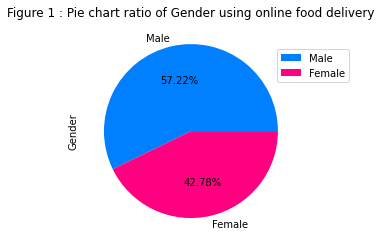

In [11]:
# Make pie chart for identify Gender 
graph_1 = df["Gender"].value_counts()
graph_1.plot(kind='pie',colors = ["#0080ff",'#ff0080'],\
            legend=True, autopct='%1.2f%%',\
            title="Figure 1 : Pie chart ratio of Gender using online food delivery")
plt.legend(bbox_to_anchor=(1.25, .90), loc='upper right')
plt.show()

The pie graph in Figure 1 shows that ratio is see that the majority of users are men, about 57%, which is about 43% more than women.


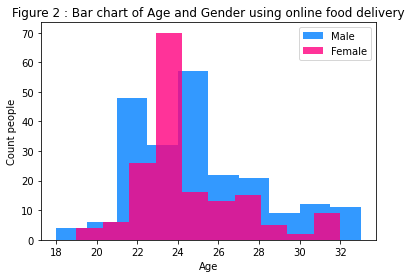

Mean of age :  24.63
Mean of male age :  24.79
Mean of female age : 24.42


In [12]:
# Make histogram chart for spread Gender and Age
plt.hist(df[df['Gender'] == 'Male']['Age'], alpha=0.8,color = '#0080ff' , label='Male')
plt.hist(df[df['Gender'] == 'Female']['Age'], alpha=0.8,color = '#ff0080', label='Female')
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Count people')
plt.title('Figure 2 : Bar chart of Age and Gender using online food delivery')
plt.show()

print("Mean of age :  %.2f" %(df['Age'].mean()))
print("Mean of male age :  %.2f" %(df[df['Gender'] == 'Male']['Age'].mean()))
print("Mean of female age : %.2f" %(df[df['Gender'] == 'Female']['Age'].mean()))

The bar graph in Figure 2 shows that the age distribution is skewed to the right, with Mode values exceeding Mean values. The graph indicates that the majority of users of the service are between the ages of 22 and 25 and that there are more female users than male users between the ages of 23 and 24.

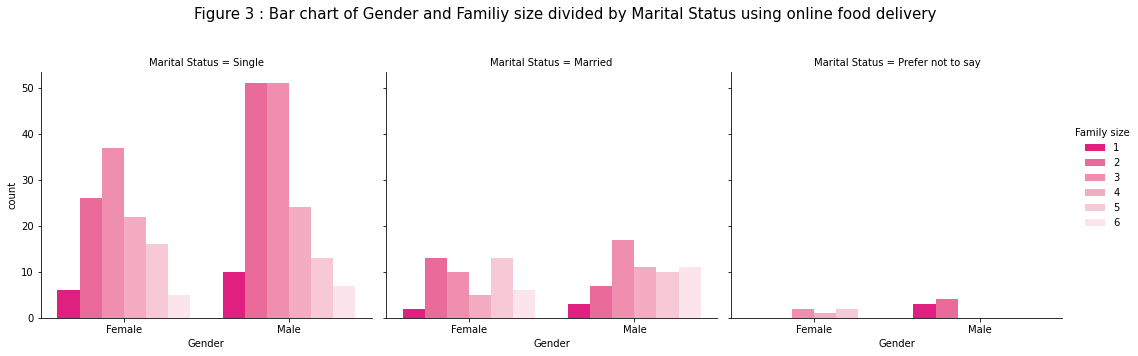

In [13]:
#Make bar chart to compare age and family size divided by Marital Status
graph_3 = sns.catplot(x='Gender', hue='Family size', col="Marital Status", data=df, kind="count", 
            palette=['#ff0080', '#ff5594','#ff7ea8', '#ffa0bd', '#ffc1d3', '#ffe0e9', '#ffffff'])
graph_3.fig.subplots_adjust(top=0.8) 
graph_3.fig.suptitle('Figure 3 : Bar chart of Gender and Familiy size divided by Marital Status using online food delivery'\
                     , fontsize=15)
plt.show()

The bar graph in Figure 3 shows that the majority of customers, regardless of gender, are men who are single. There are roughly 3 family members; the number is comparable for men and women.

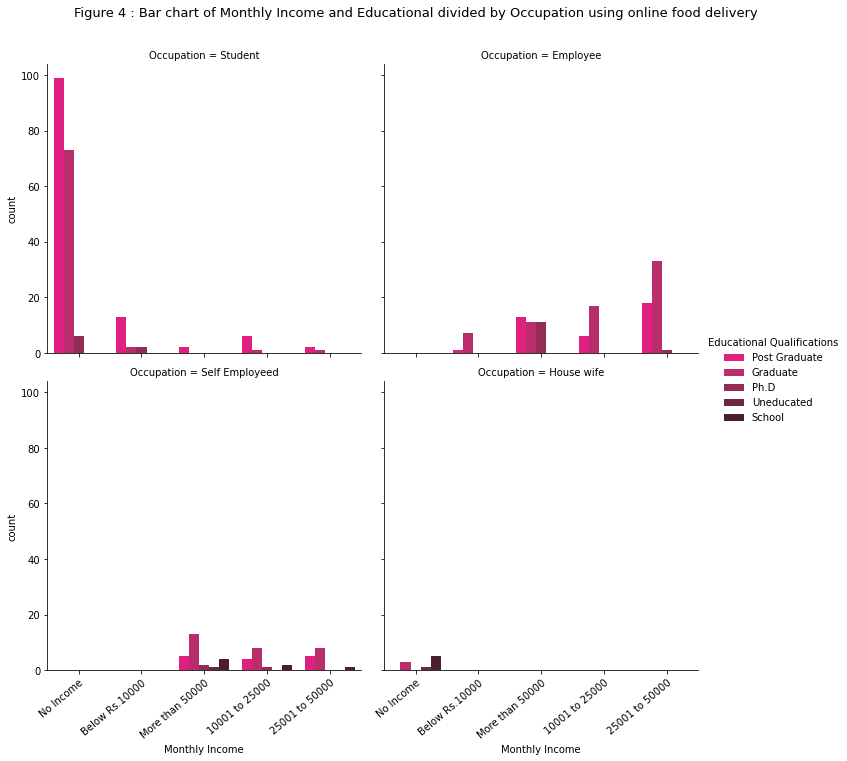

In [14]:
#Make bar chart to compare monthly income and educational Qualifications divided by Occupation
graph_4 = sns.catplot(x='Monthly Income', hue="Educational Qualifications", col='Occupation', data=df, kind="count", 
            palette=['#ff0080', '#d0166a', '#a41c54', \
                     '#791c3f', '#51182c', '#2b1219', '#000000'], col_wrap=2)
graph_4.set_xticklabels(rotation=40, ha='right', rotation_mode='anchor')
graph_4.fig.subplots_adjust(top=0.9) 
graph_4.fig.suptitle('Figure 4 : Bar chart of Monthly Income and Educational divided by Occupation using online food delivery'\
                     , fontsize=13)
plt.show()

The bar graph in Figure 4 shows that the majority of the customers are students and no income who is a bachelor's degree as well as a master's degree. which might be in hostels making it difficult for them to prepare meals for themself. Housewives and self-employed rarely used food delivery apps because they are free time and come from cooking on their own

####  Customer factors

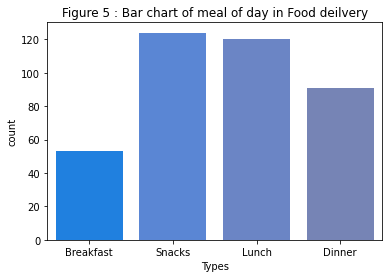

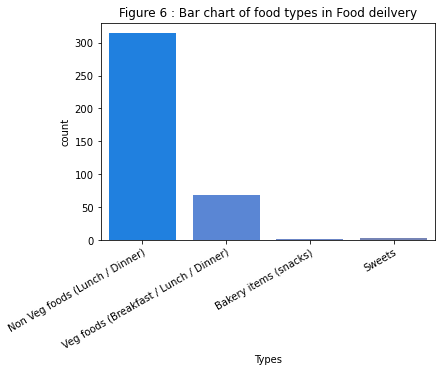

In [15]:
#Make bar chart to compare meal in customer using food deilvery 
graph_5 = sns.countplot(x='Meal(P1)', data=df, palette=['#0080ff', '#4580e9', '#5c7fd4', '#6b7fbf'])
graph_5.set_xlabel("Types")
graph_5.set_title("Figure 5 : Bar chart of meal of day in Food deilvery")
plt.show()
 
#Make bar chart to compare type of meal in customer using food deilvery 
graph_6 = sns.countplot(x='Perference(P1)', data=df, palette=['#0080ff', '#4580e9', '#5c7fd4', '#6b7fbf'])
graph_6.set_xticklabels(graph_6.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
graph_6.set_xlabel("Types")
graph_6.set_title("Figure 6 : Bar chart of food types in Food deilvery")
plt.show()

It is evident from the graph (Fig. 5) that users typically order snacks and lunches when placing food orders and then dinner; judging from the graph (Fig. 6), users prefer to eat meat-based foods and then a vegetarian meal. The majority of the customers are probably teenagers and college students who like to eat at lunch and prefer meat dishes

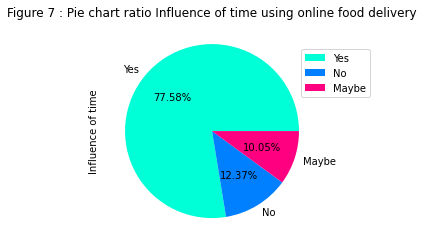

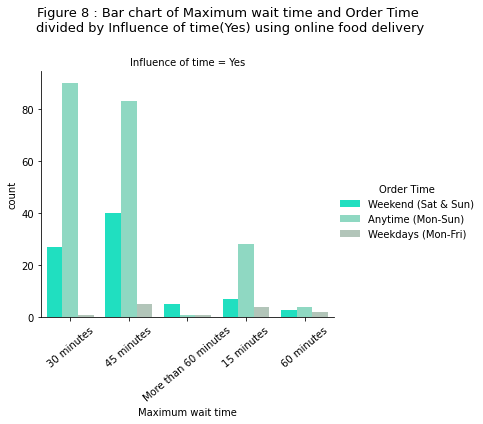

In [16]:
#Make pie chart for show factor of time using food delivery
graph_7 = df['Influence of time'].value_counts()
graph_7.plot(kind='pie',colors = ['#00ffd6','#0080ff','#ff0080'],\
            legend=True, autopct='%1.2f%%',\
            title="Figure 7 : Pie chart ratio Influence of time using online food delivery")
plt.legend(bbox_to_anchor=(1.25, .90), loc='upper right')
plt.show()

#Create a bar graph of people who concur that time influences the use of food delivery apps.
#To see the wait times for food orders at various times, 
graph_8 = sns.catplot(x='Maximum wait time', hue="Order Time"\
            , col='Influence of time', data=df[df["Influence of time"]=="Yes"], kind="count",
            palette=['#00ffd6', '#83e4c7', '#afc8b8']) 
graph_8.set_xticklabels(rotation=40)
graph_8.fig.subplots_adjust(top=0.8) # adjust the Figure in graph_3
graph_8.fig.suptitle('Figure 8 : Bar chart of Maximum wait time and Order Time \ndivided by Influence of time(Yes) using online food delivery'\
                     , fontsize=13)
plt.show()

The graph (Fig. 7) shows that the majority of users, or 77.58%, have a relatively positive opinion of how time affects the app. See the graph (Fig. 8) for a breakdown of how long people can be able to withstand waiting time for food delivery up to about 45 minutes.

In [17]:
#Create a dict for changing text(key) into value for calculate(value)
convert_text_1 = {'Strongly agree' : 5, 
                  'Agree' : 4, 
                  'Neutral' : 3, 
                  'Disagree' : 2,
                  'Strongly disagree' : 1, 
                  'Very Important' : 5, 
                  'Important' : 4, 
                  'Moderately Important' : 3, 
                  'Slightly Important' : 2,
                  'Unimportant' : 1}

#Change all the verbal values in the Ease and convenient to Good Quantity columns to the dict in the % value score 
convert_dict = {}
for d in df.columns[16:53]:
    c = (df[d].map(convert_text_1).sum())/(df.shape[0]*5)*100 
    convert_dict[d] = c

#Delete key not use in convert_dict
convert_dict.pop('Influence of time')
convert_dict.pop('Order Time')
convert_dict.pop('Maximum wait time')
convert_dict.pop('Influence of rating')

#Change convert_dict to series for plot bar plot
series_convert = pd.Series(convert_dict)

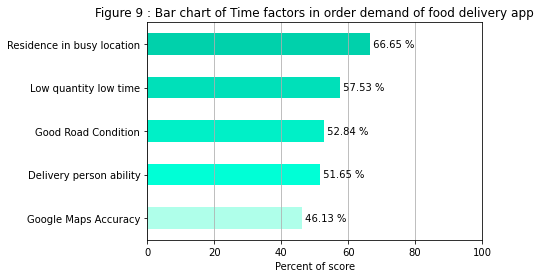

In [18]:
#Create a graph from the user feedback. On the time factor in order demand of the food delivery app
g_series_convert_9 =series_convert['Residence in busy location':'Delivery person ability'].sort_values().plot.barh\
    (color=['#afffea', '#00ffd6','#00f0c7', '#00e0b9','#00d1ab'])
for bars in g_series_convert_9.containers:
    g_series_convert_9.bar_label(bars,fmt=' ''%.2f'" %% ")
plt.xlim(0,100)
g_series_convert_9.set_title('Figure 9 : Bar chart of Time factors in order demand of food delivery app')
g_series_convert_9.set_xlabel("Percent of score")
plt.grid(axis='x')
plt.show()

By the graph (Fig. 9), users believe the following factors to be the most important in Time factor in : The rest of the topics received scores that were comparable to crowded places of residence, which received a score of 66.65%. The subject with the worst grade is With a score of 46.13 percent, Google Maps accuracy score. Demonstrates that its creators are aware that if the map is in a busy area, it will delay transportation. Additionally, it demonstrates the accuracy of the food delivery app's use of localization technology.

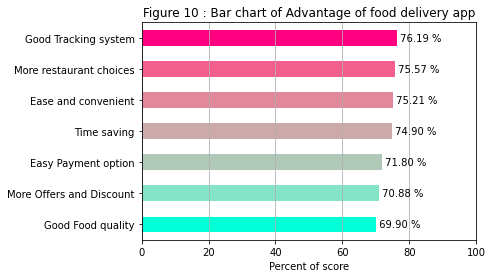

In [19]:
#Create a graph from the user feedback. On the advantages of the food delivery app
g_series_convert_10 = series_convert['Ease and convenient':'Good Tracking system'].sort_values()\
    .plot.barh(color=['#00ffd6', '#83e4c7', '#afc8b8', '#ccaaa9'\
    ,'#e2889b','#f25f8d','#ff0080'])
for bars in g_series_convert_10.containers:
    g_series_convert_10.bar_label(bars,fmt=' ''%.2f'" %% ") 
plt.xlim(0,100) 
g_series_convert_10.set_title('Figure 10 : Bar chart of Advantage of food delivery app')
g_series_convert_10.set_xlabel("Percent of score")
plt.grid(axis='x') 
plt.show()

The graph (Fig.10) shows that the user acknowledges that the food delivery app with a score of over 74% indicating that users use the app, there are many benefits, with the top four being a good transportation tracking system, a large selection of restaurants, easy and convenient, and time-saving, respectively. Food delivery is done for convenience, time savings, and the desire to select the food you want to eat.

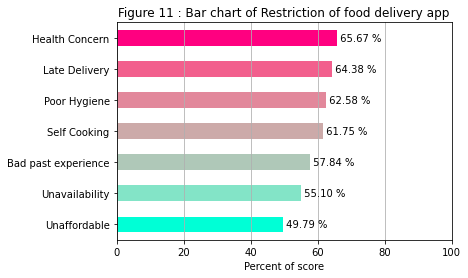

In [20]:
#Create a graph from the user feedback. On the restriction of the food delivery app
g_series_convert_11 = series_convert['Self Cooking':'Unaffordable'].sort_values().plot.barh\
    (color=['#00ffd6', '#83e4c7', '#afc8b8', '#ccaaa9'\
    ,'#e2889b','#f25f8d','#ff0080'])
for bars in g_series_convert_11.containers:
    g_series_convert_11.bar_label(bars,fmt=' ''%.2f'" %% ")
plt.xlim(0,100)
g_series_convert_11.set_title('Figure 11 : Bar chart of Restriction of food delivery app')
g_series_convert_11.set_xlabel("Percent of score")
plt.grid(axis='x')
plt.show()

According to the graph (Fig. 11), users prioritize cleanliness as their top concern followed by health concern and late shipments obtaining ratings of 65.67%, 64.38 %, and 62.5 %, respectively. Because of the arrival of COVID-19, which increased consumer concern.

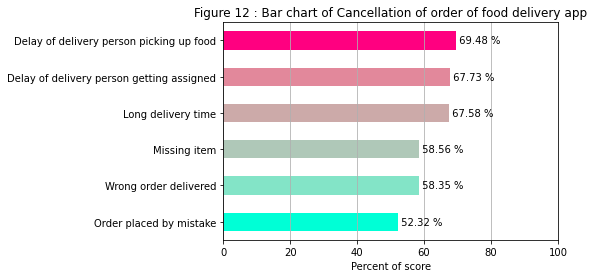

In [21]:
#Create a graph from the user feedback. On the Cancellation of the food delivery app
g_series_convert_12 = series_convert['Long delivery time':'Order placed by mistake']\
    .sort_values().plot.barh(color=['#00ffd6', '#83e4c7', '#afc8b8', '#ccaaa9'\
    ,'#e2889b','#ff0080'])
for bars in g_series_convert_12.containers:
    g_series_convert_12.bar_label(bars,fmt=' ''%.2f'" %% ")
plt.xlim(0,100)
g_series_convert_12.set_title('Figure 12 : Bar chart of Cancellation of order of food delivery app')
g_series_convert_12.set_xlabel("Percent of score")
plt.grid(axis='x')
plt.show()

The graph (Fig. 12) shows that the majority of users commented on the top three cancellations in terms of transit times. The delay in picking up food from the store by Rider will come in first. The rider's tardiness in accepting the job was next and the third place is The delivery times with scores of 69.48%, 67.73%, and 67.58%, respectively, suggesting that there may not be enough riders to receive additional service from users or that during peak hours there are numerous people who use it.

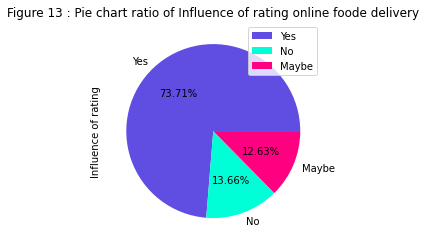

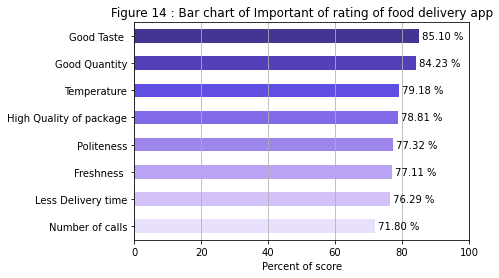

In [22]:
#Make pie chart for show factor of time using food delivery
time_13 = df['Influence of rating'].value_counts()
time_13.plot(kind='pie',colors = ['#604de2','#00ffd6','#ff0080'],\
            legend=True , autopct='%1.2f%%',\
            title="Figure 13 : Pie chart ratio of Influence of rating online foode delivery")
plt.show()

#Create a graph from the user feedback. On the important of ratingn of the food delivery app
g_series_convert_14 = series_convert['Less Delivery time':'Good Quantity'].sort_values().plot.barh\
    (color=['#e9e0fb','#d1c1f7','#b9a3f2','#9f86ed','#8269e8','#604de2','#5241b8','#433591'])
plt.xlim(0,100)
for bars in g_series_convert_14.containers:
    g_series_convert_14.bar_label(bars,fmt=' ''%.2f'" %% ")
g_series_convert_14.set_title('Figure 14 : Bar chart of Important of rating of food delivery app')
g_series_convert_14.set_xlabel("Percent of score")
plt.grid(axis='x')
plt.show()

The graph (Fig. 13) shows that the majority of users concur that rating factors have an impact on food delivery apps. With a high percentage of 73.71% and the graph (Fig. 14), it is clear that the top two services are the subject according to the service users' ratings. The percentage scores for good food taste and high-quality food are 85.10% and 84.23%, respectively, but, interestingly, the top 4 are all related to food quality. The following four ranks will be in terms of service.

#### Section 2 : analyze review to evaluate elements or developments in light of lack of services, summarize, and improve

In [23]:
#Make list of word about meanings "No" and not related in word 
#Reviews- Nil value means no comment 
no_comment = ['NIL','nil','-','NiL','Nil','No','N0','Nil\n','Nill','No Comments!'
              ,'nil ','None','Nil ','560075','No issues']

#Creating a copy
df_reviews = df.copy() 

#Removing Nil value only columns 'Reviews'
df_reviews = df[~df['Reviews'].isin(no_comment)]
df_reviews = df_reviews[['Reviews']] 
df_reviews 

,Reviews
2,"Many a times payment gateways are an issue, so..."
11,Language barrier is also one major issue. Mosl...
17,"Spillage, bad packaging and missing items"
18,Once my order from kfc got exchanged with some...
22,I feel Swiggy has a good interface for users a...
...,...
375,I had bad quality order delivered twice
376,Bad rating doesn't mean that the food tastes b...
377,Order delivered to my location are late
378,My location is pretty well built for food deli...


In [24]:
#Function for cleaning in review
def review_cleaning(text):
    '''
        Parameter:
            str(text)
        Return 
            str(text) Return the text have lowercase and remove text in square brackets,links,punctuation and word containing numbers
    '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

#Applying the function on reviews column
df_reviews['Reviews']=df_reviews['Reviews'].apply(review_cleaning)
df_reviews 

,Reviews
2,many a times payment gateways are an issue so ...
11,language barrier is also one major issue moslt...
17,spillage bad packaging and missing items
18,once my order from kfc got exchanged with some...
22,i feel swiggy has a good interface for users a...
...,...
375,i had bad quality order delivered twice
376,bad rating doesnt mean that the food tastes ba...
377,order delivered to my location are late
378,my location is pretty well built for food deli...


In [25]:
#Create func. by Library TextBlob to read the statement statement positive or negative comments 
#command by .sentiment and .polarity
def setiment_score(text):
    '''
    Return the score level of text tone
        Parameter:
            str(text)
        Return 
             score level of text tone (positive >0 and negative <=0)
    '''
    return TextBlob(text).sentiment.polarity

#Applying the function and create new column 'sentiment_score' for save value
df_reviews['sentiment_score'] = df_reviews.Reviews.apply(setiment_score)
df_reviews

,Reviews,sentiment_score
2,many a times payment gateways are an issue so ...,0.500000
11,language barrier is also one major issue moslt...,0.145833
17,spillage bad packaging and missing items,-0.450000
18,once my order from kfc got exchanged with some...,0.000000
22,i feel swiggy has a good interface for users a...,0.177778
...,...,...
375,i had bad quality order delivered twice,-0.700000
376,bad rating doesnt mean that the food tastes ba...,-0.570833
377,order delivered to my location are late,-0.300000
378,my location is pretty well built for food deli...,0.250000


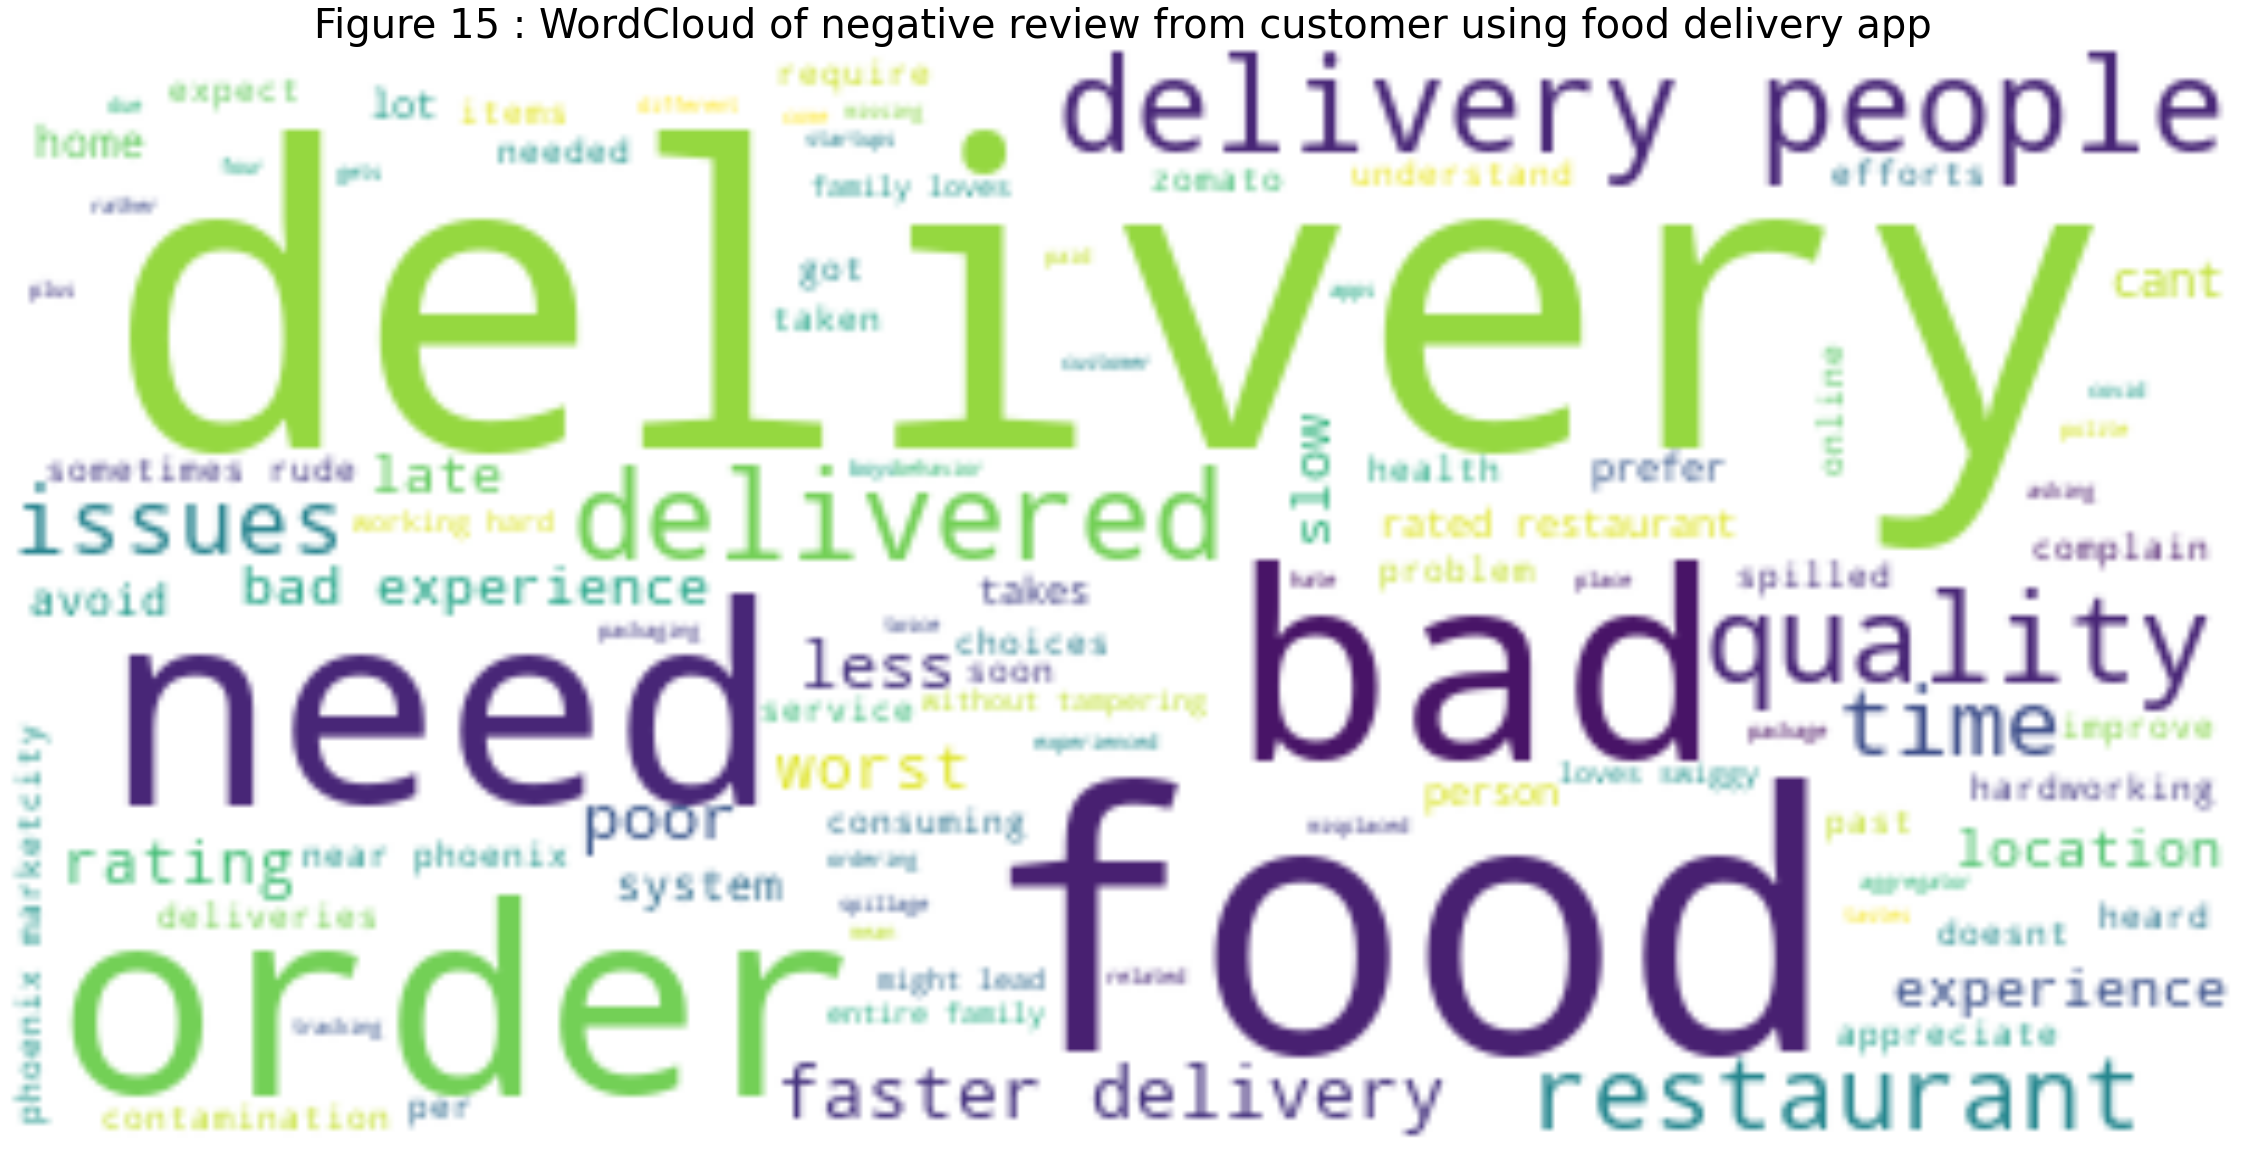

In [26]:
#Consider only negative review by column sentiment_score <=0 
neg_text = df_reviews[df_reviews['sentiment_score']<=0]['Reviews']

#Make Wordcloud to show about word in negative review
wordcloud = WordCloud(background_color = 'white',
                      stopwords = STOPWORDS).generate(' '.join(neg_text.values)) 
fig = plt.figure(figsize = (40, 30)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.title('Figure 15 : WordCloud of negative review from customer using food delivery app', fontsize=40)
plt.axis("off")
plt.show()

It is clear from the WorldCould figure (Fig. 15) that the majority of words used by users are delivery, food, order, people, bad, and restaurant. These terms are probably derived from the delivery service, which is unavailable in terms of delivery time and rider service. Additionally, there is the matter of food, which is consistent with the underlying factors that have been examined, according to which consumers give food a high priority.

We have inferred from the information that some customers have requirements regarding delivery time. and the food's quality because the food delivery service has sections for both of these things. In order to determine where and how much this area of the shipping line was congested, we plotted the data on a map.

In [29]:
#Make map destination of food order form latitude and longitude columns

#Make scope of map in variable map1
map1 = folium.Map(
    location = [12.9770, 77.5921],
    zoom_start = 12,
    tiles='cartodbpositron')

#Plot latitude and longitude in map1
for idx, row in df.iterrows():
    Marker([row['latitude'], row['longitude']],).add_to(map1)

map1

From the map of the food transport area to different users, it can be seen that the distribution is concentrated in the city. Transport service providers can use this data to estimate the cost of shipping goods to more customers and consider hiring more riders.

# Section 3 : 

## Key Findings:

1. Customers of the food delivery app are mostly teenagers aged 22 to 25, with an average of 3 family members, the majority of whom are single. The majority of the education levels are master's and bachelor's degrees with no income. Also popular for lunch, snacks, and dinner as meat dishes.
2. Customers who use the Food delivery app's time aspect may have to wait up to 45 minutes on weekends and every day. Residence in a busy location was the time factor that was the most accepted by the user.
3. Factors of Advantage and Restriction of the customer on food delivery app
    * Advantage: Good Tracking system, More choices, Ease of convenient and time-saving 
    * Restriction: Quality of food Health and Hygiene and Late delivery 
4. Factor of Cancelling of order and Rating of the customer on food delivery app
    * Cancelling of order: Delay of the delivery driver picking up and getting assigned and long time delivery 
    * Rating: About food relate to taste,quantity, temperature and package
5. The opinion that customers want to improve the delivery service in terms of time and rider, in addition to improving the food quality.

<div class="alert alert-info">
<h3>What’s Next / Recommendation:</h3>
</div>

1. The majority of service users' problems or concerns are related to time, which should be further analyzed in the delivery time information. Receiving a request the time from the time the order is placed until the customer receives the food is calculated to better manage the delivery request.
2. The analysis of store location information for analyzing restaurant partners in food quality.

<div class="alert alert-info">
<h3>Financial Benefit:</h3>
</div>

1. In addition to student customers, we see those who are employed and make more entering this market to increase the customer base and use more services.
2. Run a package promotion to encourage customers to spend more money on the app because the average customer family size is three.

<div class="alert alert-info">
<h3>Non-Financial Benefit:</h3>
</div>

1. Boost the level of quality of restaurant partners to impose more trust in service users, provide information about food safety, suggest packaging that can be transported, and advertise to customers that this restaurant has received a certificate for cleanliness.
2. Due to partners' and time transportation issues, We might decide to analyze, for instance, the addition of the rider use Referral program that encourages riders to earn recommendations to attract in more riders. Alternately, raise the pay rate for riders during rush hour to encourage them to take the road. minimize the time issue.